In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Function for gradient descent

In [41]:
def gradient_descent(f, grad_f, x0, kmax, lr='Armijo', tolf = 10e-6, tolx = 10e-6):
    '''
    Inputs : 
       - f is a python function
       - grad_f is a python function
       - x0 is the starting guess
       - tolf and tolx are conditions
       - kmax is maximum number of iteration, to avoid infinite loops
       - lr is the value of alpha, if None the armijo rule is applied
    Returns :
       x --> stationary point
       f_val --> A vector containing the values of f during the iterations
       err_val --> A vector containing the values of || grad(f(Xk) || 
    '''
    
    # Set the iteration conuter
    k = 0

    # Define the vectors to return
    fval = np.zeros((kmax + 1,))
    err_val = np.zeros((kmax +1,))
    grads = np.zeros((kmax + 1, x0.shape[0]))
    x_val = np.zeros((kmax + 1, x0.shape[0]))
    
    # Initialize the condition to broke the loop
    conditions = False  
    
    # Lets keep track of the first guess
    first_value = x0
    
    # Extract the dimension of the function domain
    N = x0.shape[0]
   
    while not conditions:
        # Update alpha if Armijo is selected
        if lr == 'Armijo':
            alpha = backtracking(f, grad_f, x0)
        else : 
            alpha = lr
        # Compute the gradient
        grad = grad_f(x0)

        # Compute the new set of parameters
        x = x0 - grad * alpha

        # Update the arrays
        x_val[k] = np.reshape(x, len(x))
        grads[k] = np.reshape(grad, (N,))
        fval[k] = f(x)
        err_val[k] = np.linalg.norm(x - x0)

        # Check the conditions
        conditions = (
            k >= kmax or 
            np.linalg.norm(grad_f(x)) < tolf * np.linalg.norm(grad_f(first_value)) or
            err_val[k] < tolx * np.linalg.norm(x0)  
        )
        
        # Update the parameters
        x0 = x
        
        k += 1


    fval = fval[:k]
    err_val = err_val[:k]
    x_val = x_val[:k, :]
    grads = grads[:k, :]

    return x, fval, err_val, x_val, grads

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

## 1.1) Definition of functions for which apply the gradiend descent

In [43]:
def f1(x):
    return (x[0] - 3)**2 + (x[1] -1)**2
def grad_f1(x):
    return np.array( (2 * (x[0] - 3), 2 * (x[1] - 1)) )

def f2(x): 
    return 10 * (x[0] - 1)**2 + (x[1] - 2)**2
def grad_f2(x):
    return np.array( (20 * (x[0] - 1), 2 * (x[1] - 2)) )

def set_paramf3(N, f3, grad_f3, mode):
    '''     
    Set the paramenter N of the function and return it or its gradient
    Input : N --> shape of vandermonde matrix
            f3 --> Least sqare problem function
            gradf3 --> ..
            mode :
                if "func" returns a python function with the parameters set (ready for descent)
                if "grad" return the gradient of the function with the chosen value of N 
    '''
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    def inner(x):
        if mode == 'func':
            return f3(x, v, A, b)
        elif mode == 'grad':
            return grad_f3(x, v, A, b)
    return inner
    
def f3(x, v, A, b):
    return np.linalg.norm(A @ x - b, 'fro')**2
def grad_f3(x, v, A, b):
    ''' 
    Returns a row vector with the gradient
    '''
    return (-2 * (b - A @ x).T @ A).reshape(x.shape[0], 1)


def set_paramf4(N, f4, lmbd, mode):
    """      
    Same structure of f3 but here it's set also the regularization parameter lambda
    """
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    def inner(x):
        if mode == 'func':
           return f4(x, v, A, b, lmbd)
        elif mode == 'grad':
           return grad_f4(x, v, A, b, lmbd)
    return inner

def f4(x, v, A, b, lmbd):   
    return np.linalg.norm(A @ x - b, 'fro') + lmbd / 2 * np.linalg.norm(x)**2
def grad_f4(x, v, A, b, lmbd):
    return (-2 * (b - A @ x).T @ A + lmbd * x.T).reshape(x.shape[0], 1)

def f5(x):
    return x**4 + x**3 - 2 * x**2 - 2 * x
def grad_f5(x):
    return np.array(4 * x**3 + 3 * x **2 - 4 * x - 2)

In [18]:
def plot_all(func, grad, x0, lrates, real_min = None):
    ''' 
    plot the results of gradient descent
    Input : func and grad --> defined above
            real_min :
                      if None doesn't plot the real error value
                      else plot it
            lrates --> list of alpha values (plotted togheter)
                       'Armijo' could be an element of the list
            x0 --> is the value of the starting guess for the minimum
    Returns : None 
              
    '''
    if real_min != None:
        sub1, (ax1, ax2) = plt.subplots(1, 2)
    else :
        ax1 = plt.subplot()

    for lr in lrates:
        x , fval, err_val, x_val, grads = gradient_descent(func, grad, x0, kmax = 100 , lr=lr) 
        print(
            'Min obtained {}\n lr : {}\n Niter : {}'.format(x, lr, len(err_val))
        )
        if real_min != None:
            print('Real minimum: {}\nFinal error : {}\n '.format(real_min, x - real_min))
        print(grads.shape, grads[0].shape)
        
        ax1.plot(range(len(err_val)), np.linalg.norm(grads, axis = 1))
        if real_min != None:
            plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - real_min, axis = 1))
    plt.legend(lrates)
    plt.show()

def loop(funcs, grads, x0s, lrates, real_mins=None):
    '''
    Simply loop of plot_all 
    funcs and grads must correspond to a correct computation of the descent
    '''
    for i in range(len(funcs)):
        plot_all(funcs[i], grads[i], x0s[i], lrates, real_mins)


### 2) Visualization

Min obtained [[0.99946547]
 [1.00015894]]
 lr : Armijo
 Niter : 54
(54, 2) (2,)
Min obtained [[0.32461014]
 [0.9663632 ]]
 lr : 0.0041
 Niter : 101
(101, 2) (2,)
Min obtained [[0.12613308]
 [0.41024089]]
 lr : 0.001
 Niter : 101
(101, 2) (2,)


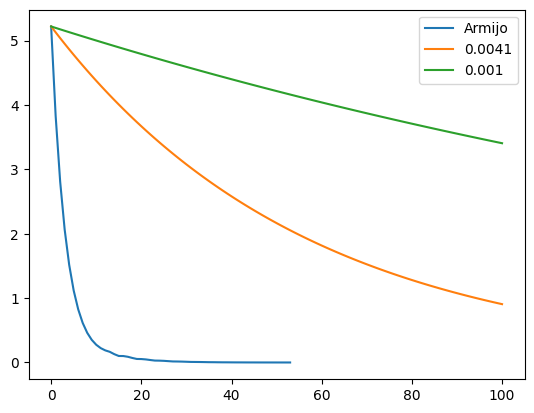

Min obtained [[0.8244374 ]
 [0.97224843]
 [1.08557757]
 [1.04149269]
 [0.98815973]]
 lr : Armijo
 Niter : 101
(101, 5) (5,)
Min obtained [[0.40841202]
 [0.53504575]
 [0.71242067]
 [0.96899685]
 [1.26254711]]
 lr : 0.0041
 Niter : 101
(101, 5) (5,)
Min obtained [[0.21716362]
 [0.29178423]
 [0.40516899]
 [0.59560451]
 [1.04730603]]
 lr : 0.001
 Niter : 101
(101, 5) (5,)


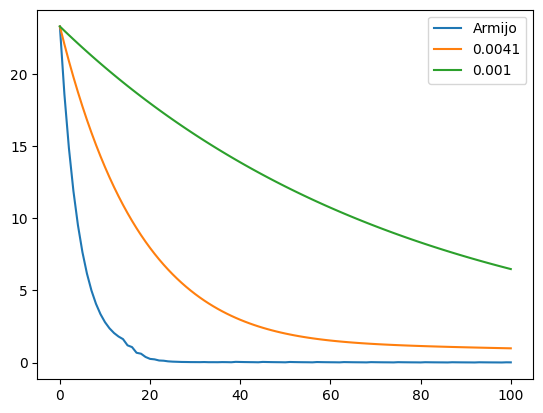

Min obtained [[0.77031525]
 [0.84470059]
 [0.92124689]
 [0.9965557 ]
 [1.06442163]
 [1.11372134]
 [1.12482127]
 [1.06496749]
 [0.89596564]
 [1.00772693]]
 lr : Armijo
 Niter : 101
(101, 10) (10,)
Min obtained [[0.49653188]
 [0.56158055]
 [0.63638698]
 [0.72252843]
 [0.82159054]
 [0.93461695]
 [1.0603218 ]
 [1.18880262]
 [1.27505277]
 [0.98606191]]
 lr : 0.0041
 Niter : 101
(101, 10) (10,)
Min obtained [[0.29517094]
 [0.33772171]
 [0.38825136]
 [0.44893632]
 [0.5228419 ]
 [0.61444945]
 [0.73062113]
 [0.88247993]
 [1.0892172 ]
 [1.37342154]]
 lr : 0.001
 Niter : 101
(101, 10) (10,)


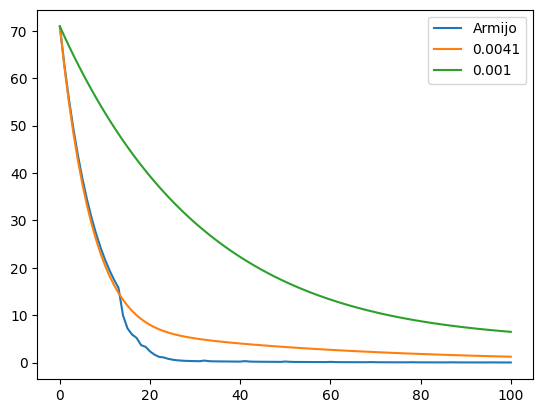

Min obtained [[0.7727471 ]
 [0.82012793]
 [0.86852556]
 [0.91723682]
 [0.96523179]
 [1.0110248 ]
 [1.05249636]
 [1.08665405]
 [1.10933319]
 [1.11489714]
 [1.09621564]
 [1.04600921]
 [0.96386224]
 [0.88782753]
 [1.02442487]]
 lr : Armijo
 Niter : 101
(101, 15) (15,)
Min obtained [[0.53376213]
 [0.57734135]
 [0.62479789]
 [0.67646404]
 [0.73266022]
 [0.79365671]
 [0.85960083]
 [0.93037812]
 [1.00534137]
 [1.08276145]
 [1.15864959]
 [1.22401805]
 [1.25770106]
 [1.20369819]
 [0.86068936]]
 lr : 0.0041
 Niter : 101
(101, 15) (15,)
Min obtained [[0.34762758]
 [0.37897601]
 [0.41383579]
 [0.45273727]
 [0.4963192 ]
 [0.54535642]
 [0.60079482]
 [0.66379353]
 [0.73576994]
 [0.81842691]
 [0.91368584]
 [1.02323449]
 [1.14643569]
 [1.26978065]
 [1.25955683]]
 lr : 0.001
 Niter : 101
(101, 15) (15,)


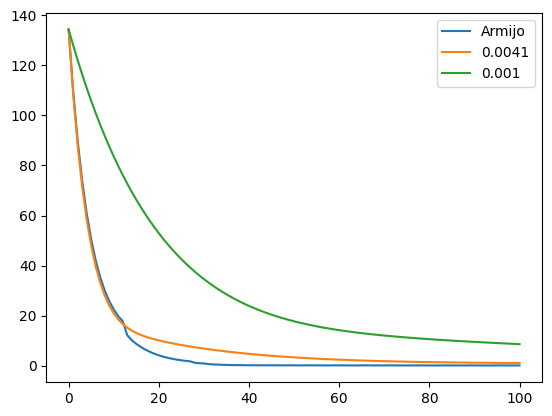

Min obtained [[0.84336374]
 [0.87595452]
 [0.9081992 ]
 [0.93968792]
 [0.96991131]
 [0.99824095]
 [1.02390779]
 [1.04598043]
 [1.06334703]
 [1.07470956]
 [1.07860816]
 [1.07351225]
 [1.05805397]
 [1.03156168]
 [0.99522729]
 [0.95461878]
 [0.92498469]
 [0.94136519]
 [1.06453088]
 [0.99355356]]
 lr : Armijo
 Niter : 101
(101, 20) (20,)
Min obtained [[0.56113323]
 [0.59399968]
 [0.62887163]
 [0.66584821]
 [0.70501801]
 [0.74645013]
 [0.79018069]
 [0.83619216]
 [0.88438151]
 [0.93451083]
 [0.98612889]
 [1.03844472]
 [1.09011839]
 [1.13890454]
 [1.18102428]
 [1.21001599]
 [1.21456113]
 [1.17440135]
 [1.05487548]
 [0.87667632]]
 lr : 0.0041
 Niter : 101
(101, 20) (20,)
Min obtained [[0.38657446]
 [0.41181955]
 [0.43906189]
 [0.46850613]
 [0.50038378]
 [0.53495714]
 [0.57252371]
 [0.61342065]
 [0.65802892]
 [0.7067757 ]
 [0.76013249]
 [0.81860274]
 [0.88268609]
 [0.9527882 ]
 [1.02900019]
 [1.11054191]
 [1.19423828]
 [1.26971244]
 [1.30006711]
 [1.07022823]]
 lr : 0.001
 Niter : 101
(101, 20)

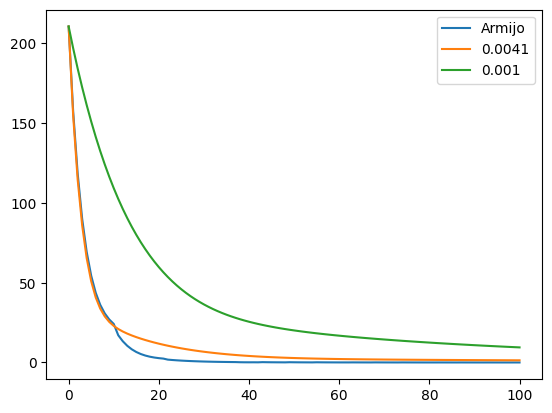

Min obtained [[0.7467894 ]
 [0.77483135]
 [0.80345049]
 [0.83255506]
 [0.86202549]
 [0.89170796]
 [0.92140635]
 [0.95087235]
 [0.9797933 ]
 [1.00777706]
 [1.03433366]
 [1.05885304]
 [1.08057862]
 [1.09857729]
 [1.11170791]
 [1.11859457]
 [1.11761986]
 [1.1069743 ]
 [1.08484646]
 [1.0499554 ]
 [1.00292158]
 [0.94973898]
 [0.9105546 ]
 [0.93945051]
 [1.02937614]]
 lr : Armijo
 Niter : 101
(101, 25) (25,)
Min obtained [[0.58576792]
 [0.61239395]
 [0.64023672]
 [0.66933325]
 [0.69971431]
 [0.73140134]
 [0.76440238]
 [0.79870637]
 [0.83427545]
 [0.87103422]
 [0.90885481]
 [0.9475359 ]
 [0.98677285]
 [1.02611479]
 [1.0649019 ]
 [1.10217255]
 [1.13652326]
 [1.16589408]
 [1.18723434]
 [1.19597839]
 [1.18524146]
 [1.14474923]
 [1.06059925]
 [0.92630733]
 [0.93593044]]
 lr : 0.0041
 Niter : 101
(101, 25) (25,)
Min obtained [[0.41565271]
 [0.4368489 ]
 [0.45933115]
 [0.48319756]
 [0.50855537]
 [0.53552181]
 [0.56422495]
 [0.59480449]
 [0.62741236]
 [0.66221297]
 [0.69938277]
 [0.73910858]
 [0.781

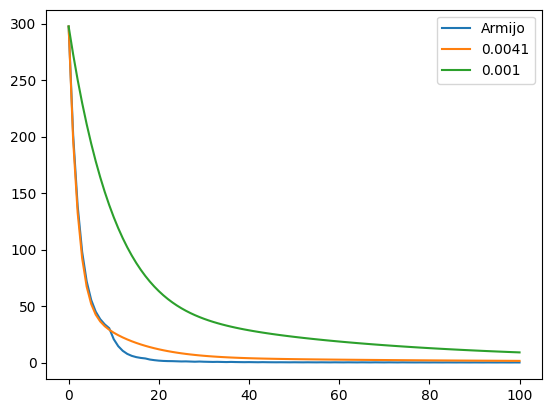

In [27]:
# Decide the starting guess (usally zeros)
# It must match the domain of the corresponding 
# function defined
x0 = np.zeros((2, 1))

# Choose the function and set the paramenters if necessary
func = set_paramf3(2, f3, grad_f3, mode = 'func')
grad = set_paramf3(2, f3, grad_f3, mode = 'grad')

# Set the minimum if known
real_min = None

# Define a list of alpha (learning rates) for which apply GD
lrates = [round(1 / n**5, 4) for n in range(3,5)]

# Armijo it's an option
lrates.insert(0, 'Armijo')


# Plot all will plot the gradient norm for different values of the lr
plot_all(func, grad, x0, lrates, real_min)

# Loop call plot all for a series of functions in the same domain
# Can be used to apply GD changing the paramenters of the function

# E.G. 
# funcions, gradients and starting guess MUST have suitable dimension
funcs = [set_paramf3(i, f3, grad_f3, mode='func') for i in range(5, 30, 5)]
grads = [set_paramf3(i, f3, grad_f3, mode='grad') for i in range(5, 30, 5)]
x0s = [np.zeros((i, 1)) for i in range(5, 30, 5)]

loop(funcs, grads, x0s, lrates)


#### Plotting f5
$ f5 : \mathbb{R} \to \mathbb{R} $

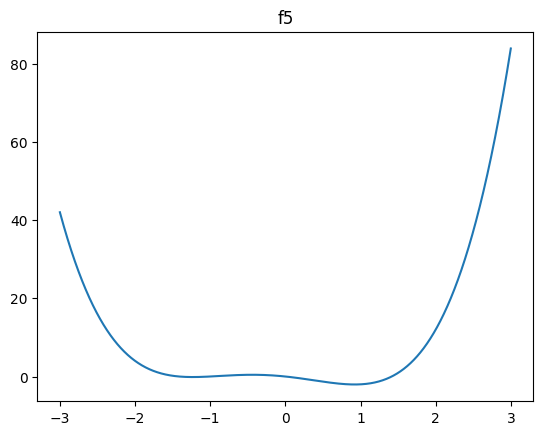

(1, 1)
Descent with starting guess 0
Min obtained [[0.92219092]]
 lr : Armijo
 Niter : 48
(48, 1) (1,)
Min obtained [[0.86855448]]
 lr : 0.0041
 Niter : 101
(101, 1) (1,)
Min obtained [[0.2410564]]
 lr : 0.001
 Niter : 101
(101, 1) (1,)


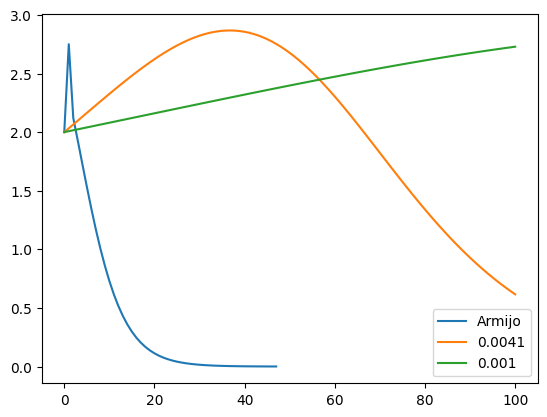

Descent with starting guess near to a local minimum
Min obtained [[-1.23233765]]
 lr : Armijo
 Niter : 80
(80, 1) (1,)
Min obtained [[-1.25428095]]
 lr : 0.0041
 Niter : 101
(101, 1) (1,)
Min obtained [[-1.53171725]]
 lr : 0.001
 Niter : 101
(101, 1) (1,)


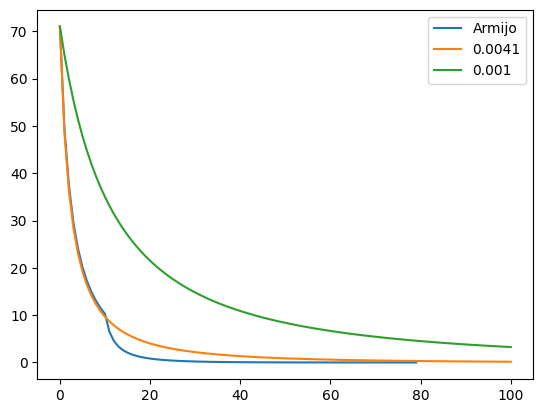

In [35]:
# f5 plotting
x = np.array(np.arange(-3, 3, 0.001))
y = [f5(i) for i in x]

plt.plot(x, y)
plt.title('f5 from -3 to 3')
plt.show()


print('Descent with starting guess 0')
plot_all(f5, grad_f5, np.zeros((1,1)), lrates)

print('Descent with starting guess near to a local minimum')
st_guess = np.array(-3)
plot_all(f5, grad_f5, np.reshape(st_guess, (1,1)), lrates)

(77, 2)


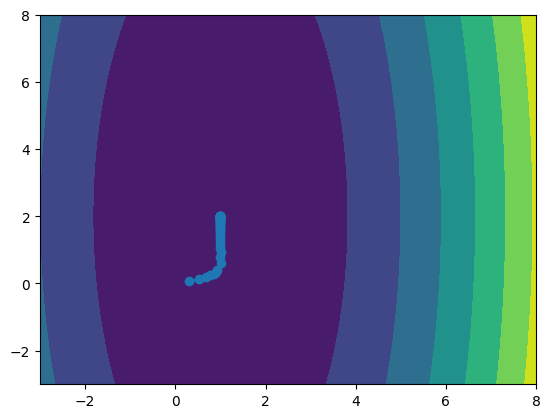

In [52]:
x0 = np.zeros((2,1))
min, f_val, err, xval, grads = gradient_descent(f2, grad_f2, x0, 100)

print(xval.shape)
xv = np.linspace(-3, 8, 300)
yv = np.linspace(-3, 8, 300)
xx, yy = np.meshgrid(xv, yv)

# compute the value of f over the grid
zz = f2((xx, yy))

plt.plot(xval[:, 0], xval[:, 1], 'o-')

plt.contourf(xx, yy, zz)
plt.show()

